# Extracting data from pdfs
 ✅ In this noteBook we are going to extract data from relevant pdfs relative to our needs based paths so we can feed the documents list to RAG after converting into Vector Embeddings and saving it to a `chromadb` 
😊

# Importing Library that we are gonna use 

In [3]:
from typing import List
from langchain_core.documents import Document
from langchain_community.document_loaders import PyPDFLoader, WebBaseLoader
from langchain_unstructured import UnstructuredLoader
from langchain import hub
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import Chroma
from langchain.vectorstores import Chroma
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
import os
import bs4
from sentence_transformers import SentenceTransformer
from langchain_openai import OpenAIEmbeddings, ChatOpenAI
from langchain_huggingface import HuggingFaceEmbeddings
import ollama
from langchain.embeddings import OllamaEmbeddings, HuggingFaceEmbeddings
from langchain_ollama import OllamaEmbeddings
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import chromadb
import uuid
import os
from langchain.embeddings import HuggingFaceEmbeddings


USER_AGENT environment variable not set, consider setting it to identify your requests.


In [4]:
def clean_text(text):
    '''this functionn clean the output of the pdfloader '''
    text = text.replace('\xa0', ' ')
    text = re.sub(r'[\n\r\t]+', ' ', text)
    text = re.sub(r'\s+', ' ', text)

    return text.strip()

In [5]:
from langchain_community.document_loaders import PyPDFLoader

In [6]:
# embeddings_model = SentenceTransformer("HIT-TMG/KaLM-embedding-multilingual-mini-instruct-v1.5")
embeddings_model = HuggingFaceEmbeddings(model_name="HIT-TMG/KaLM-embedding-multilingual-mini-instruct-v1.5")

C:\Users\belha\AppData\Local\Temp\ipykernel_15900\612398256.py:2: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings_model = HuggingFaceEmbeddings(model_name="HIT-TMG/KaLM-embedding-multilingual-mini-instruct-v1.5")
Sliding Window Attention is enabled but not implemented for `sdpa`; unexpected results may be encountered.


# Loading the `ChromaDB` vectorstore to continue saving data 

In [8]:
chroma_db_path = "./chroma_db"
chroma_client = chromadb.PersistentClient(path=chroma_db_path)

In [9]:
data = chroma_client.get_collection(name="my_dataaaa")

# Document 0  REDIRECTION DE STAGE 

In [11]:
file_path = (
    "Charte.pdf"
)
loader = PyPDFLoader(file_path)
pages = []
async for page in loader.alazy_load():
    pages.append(page)

In [12]:
document0=pages[0].page_content

In [13]:
document0


'Nom  :……….…………………………  \nPrénom  : ………………………………  \nClasse … ……………………………….  \nCIN  : …………………………………..  Monastir, le …………….  \nCharte \nJe soussigné …………… ........................... ………………………….. déclare par la présente avoir pris \nconnaissance de toutes les dispositions relatives au déroulement du stage obligatoire, détaillées sur le site \nde la Faculté des Sciences de Monastir à l’adresse  : http://www.fsm.rnu.tn/fra/pages/75/Procedure , et \nrésumées ci-dessous: \nAvant le stage  : \n1.Télécharger à partir du compte étudiant la "demande de stage" (dans le menu stage)\n2.Effectuer en ligne le "dépôt" de stage\n3.Télécharger la "lettre d’affectation" de stage\n4.Ne partir en  stage qu’a vec la lettre d’affectation officielle dûment signée par le  Directeur des stages,\nsans quoi le stage ne peut être validé.\nAprès le stage  : \n1.Fournir à l’administration la "Fiche d’évaluation" (à télécharger toujours dans le menu stage)\nremplie et signée par l\'encadrant professionnel sous pli fer

# spliiting DOC0 into chunks 

In [15]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=700, chunk_overlap=100, separators=["\n\n", "\n", ".", " "])
splits1 = text_splitter.split_text(document0)

In [16]:
splits1

['Nom  :……….…………………………  \nPrénom  : ………………………………  \nClasse … ……………………………….  \nCIN  : …………………………………..  Monastir, le …………….  \nCharte \nJe soussigné …………… ........................... ………………………….. déclare par la présente avoir pris \nconnaissance de toutes les dispositions relatives au déroulement du stage obligatoire, détaillées sur le site \nde la Faculté des Sciences de Monastir à l’adresse  : http://www.fsm.rnu.tn/fra/pages/75/Procedure , et \nrésumées ci-dessous: \nAvant le stage  : \n1.Télécharger à partir du compte étudiant la "demande de stage" (dans le menu stage)\n2.Effectuer en ligne le "dépôt" de stage\n3.Télécharger la "lettre d’affectation" de stage',
 '2.Effectuer en ligne le "dépôt" de stage\n3.Télécharger la "lettre d’affectation" de stage\n4.Ne partir en  stage qu’a vec la lettre d’affectation officielle dûment signée par le  Directeur des stages,\nsans quoi le stage ne peut être validé.\nAprès le stage  : \n1.Fournir à l’administration la "Fiche d’évaluation" (à télécha

In [17]:
embeddings1 = embeddings_model.embed_documents(
    splits1
    # normalize_embeddings=True,
    # batch_size=256, 
    # show_progress_bar=True
)

In [18]:
ids1 = [str(uuid.uuid4()) for _ in range(len(splits1))]

In [19]:
data.add(
    documents=splits1,    
    embeddings=embeddings1,  
    ids=ids1
)

# Document 1 : inscri Doctorat 

In [21]:
file_path =  "circulaire 35-2010.pdf"
loader = PyPDFLoader(file_path)
pages = []
async for page in loader.alazy_load():
    pages.append(page)

In [22]:
document1=[page.page_content for doc in pages]

In [23]:
document1

['ﻓﻲ  ﺗﻮﻧﺲ14  ﺳﺒﺘﻤﺒﺮ2010  \n  \n  \nاﻟﻌﻠﻤﻲ  واﻟﺒﺤﺚ  اﻟﻌﺎﻟﻲ اﻟﺘﻌﻠﻴﻢ  وزﻳﺮ ﻣﻦ   \nإﻟﻰ و اﻟﺴﻴﺪات اﻟﺴﺎدة  :\n-اﻟﺠﺎﻣﻌﺎت  رؤﺳﺎء   \n-واﻟﺒﺤﺚ  اﻟﻌﺎﻟﻲ اﻟﺘﻌﻠﻴﻢ  ﻣﺆﺳﺴﺎت  وﻣﺪﻳﺮي  ﻋﻤﺪاء   \n  \n اﻟﻤﻮﺿﻮع : ﺑﺣﻮل اﻟﺘﺴﺠﻴﻞ  اﻟﺪآﺘﻮراﻩﺪراﺳﺎت  \n \n  \n إﻃﺎر ﻓﻲ  اﻟﻌﻤﻠﻴﺔ  اﻹﺟﺮاءات  ﻟﻠﻔﺼﻠﺿﺒﻂ  وﺗﻄﺒﻴﻘﺎ  اﻟﺪآﺘﻮراﻩ،  ﺑﺪراﺳﺎت  ﻴﻦﻟﻠﺘﺴﺠﻴﻞ  \n16 و17  ﻋاﻷﻣﻦ ﻣﺮ  ﺪد1823  ﻟﺴﻨﺔ1993  ﻓﻲ اﻟﻤﺆرخ6  ﻧﻮﻓﻤﺒﺮ1993  واﻟﻤﺘﻌﻠﻖ\n وﺟﻤﻴﻊ  اﻟﺪآﺘﻮراﻩ  ﻟﺪراﺳﺎت  اﻟﻮﻃﻨﻴﺔ  اﻟﺸﻬﺎدات  ﻋﻠﻰ اﻟﺤﺼﻮل  ﺷﺮوط  ﺑﺘﺤﺪﻳﺪ\nﺗﻤﻤﺘﻪ أو ﻧﻘﺤﺘﻪ اﻟﺘﻲ اﻟﻨﺼﻮص  . \nاﻟﺘﺎﻟﻴﺔ اﻹﺟﺮاءات  ﺗﻄﺒﻴﻖ  إﻟﻰ واﻟﺒﺤﺚ  اﻟﻌﺎﻟﻲ اﻟﺘﻌﻠﻴﻢ ﻣﺆﺳﺴﺎت  ﺟﻤﻴﻊ ﺗﺪﻋﻰ   : \n-اﻟﺪآﺘﻮراﻩ  ﺑﺪراﺳﺎت  اﻟﺘﺴﺠﻴﻞ  ﻳﺘﻢ   ﺳﻨﻮﻳﺎ  .\n-ﻓﻲ  اﻟﺪآﺘﻮراﻩ  ﺷﻬﺎدة ﻹﺳﻨﺎد  اﻟﻤﺆهﻠﺔ  واﻟﺒﺤﺚ  اﻟﻌﺎﻟﻲ اﻟﺘﻌﻠﻴﻢ ﻣﺆﺳﺴﺔ  ﺗﻀﺒﻂ   ﻣﺴﺘﻬﻞ\n ﺟﺎﻣﻌﻴﺔ  ﺳﻨﺔ آﻞ  اﻟﺘﺴﺠﻴﻞ  رزﻧﺎﻣﺔ  اﻟﻮﺳﺎﺋﻞ  ﺑﺠﻤﻴﻊ اﻟﺮزﻧﺎﻣﺔ  ﺑﻬﺬﻩ اﻹﻋﻼم  وﻳﻘﻊ\nاﻟﻤﺘﺎﺣﺔ   .\n - ﻳﻮم ﻳﺤﺪد31 ﻃﻠﺒﺔ ﻟﺘﺴﺠﻴﻞ  أﺟﻞ آﺂﺧﺮ إدارﻳﺔ ﺳﻨﺔ آﻞ ﻣﻦ دﻳﺴﻤﺒﺮ  اﻟﺪآﺘﻮراﻩ  .\n  \nاﻟﺠﺎ رؤﺳﺎء  اﻟﺴﺎدة و اﻟﺴﻴﺪات  ﻣﻌﺎتﻳﺪﻋﻰ  وﻣﺪﻳﺮو  وﻋﻤﺪاء  اﻟﻌﺎﻟﻲ اﻟﺘﻌﻠﻴﻢ ﻣﺆﺳﺴﺎت\nواﻟﺒﺤﺚ وﺣﺰم دﻗﺔ ﺑﻜﻞ اﻹﺟﺮاءات  هﺬﻩ ﺗﻄﺒﻴﻖ  إﻟﻰ  . \n \n  \n ا

In [24]:
document1 = "\n".join(document1)

# splitting DOC 1 into chunks 

In [26]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=700, chunk_overlap=100, separators=["\n\n", "\n", ".", " "])
splits2 = text_splitter.split_text(document1)

In [27]:
splits2

['ﻓﻲ  ﺗﻮﻧﺲ14  ﺳﺒﺘﻤﺒﺮ2010  \n  \n  \nاﻟﻌﻠﻤﻲ  واﻟﺒﺤﺚ  اﻟﻌﺎﻟﻲ اﻟﺘﻌﻠﻴﻢ  وزﻳﺮ ﻣﻦ   \nإﻟﻰ و اﻟﺴﻴﺪات اﻟﺴﺎدة  :\n-اﻟﺠﺎﻣﻌﺎت  رؤﺳﺎء   \n-واﻟﺒﺤﺚ  اﻟﻌﺎﻟﻲ اﻟﺘﻌﻠﻴﻢ  ﻣﺆﺳﺴﺎت  وﻣﺪﻳﺮي  ﻋﻤﺪاء   \n  \n اﻟﻤﻮﺿﻮع : ﺑﺣﻮل اﻟﺘﺴﺠﻴﻞ  اﻟﺪآﺘﻮراﻩﺪراﺳﺎت  \n \n  \n إﻃﺎر ﻓﻲ  اﻟﻌﻤﻠﻴﺔ  اﻹﺟﺮاءات  ﻟﻠﻔﺼﻠﺿﺒﻂ  وﺗﻄﺒﻴﻘﺎ  اﻟﺪآﺘﻮراﻩ،  ﺑﺪراﺳﺎت  ﻴﻦﻟﻠﺘﺴﺠﻴﻞ  \n16 و17  ﻋاﻷﻣﻦ ﻣﺮ  ﺪد1823  ﻟﺴﻨﺔ1993  ﻓﻲ اﻟﻤﺆرخ6  ﻧﻮﻓﻤﺒﺮ1993  واﻟﻤﺘﻌﻠﻖ\n وﺟﻤﻴﻊ  اﻟﺪآﺘﻮراﻩ  ﻟﺪراﺳﺎت  اﻟﻮﻃﻨﻴﺔ  اﻟﺸﻬﺎدات  ﻋﻠﻰ اﻟﺤﺼﻮل  ﺷﺮوط  ﺑﺘﺤﺪﻳﺪ\nﺗﻤﻤﺘﻪ أو ﻧﻘﺤﺘﻪ اﻟﺘﻲ اﻟﻨﺼﻮص  . \nاﻟﺘﺎﻟﻴﺔ اﻹﺟﺮاءات  ﺗﻄﺒﻴﻖ  إﻟﻰ واﻟﺒﺤﺚ  اﻟﻌﺎﻟﻲ اﻟﺘﻌﻠﻴﻢ ﻣﺆﺳﺴﺎت  ﺟﻤﻴﻊ ﺗﺪﻋﻰ   : \n-اﻟﺪآﺘﻮراﻩ  ﺑﺪراﺳﺎت  اﻟﺘﺴﺠﻴﻞ  ﻳﺘﻢ   ﺳﻨﻮﻳﺎ  .\n-ﻓﻲ  اﻟﺪآﺘﻮراﻩ  ﺷﻬﺎدة ﻹﺳﻨﺎد  اﻟﻤﺆهﻠﺔ  واﻟﺒﺤﺚ  اﻟﻌﺎﻟﻲ اﻟﺘﻌﻠﻴﻢ ﻣﺆﺳﺴﺔ  ﺗﻀﺒﻂ   ﻣﺴﺘﻬﻞ',
 '-ﻓﻲ  اﻟﺪآﺘﻮراﻩ  ﺷﻬﺎدة ﻹﺳﻨﺎد  اﻟﻤﺆهﻠﺔ  واﻟﺒﺤﺚ  اﻟﻌﺎﻟﻲ اﻟﺘﻌﻠﻴﻢ ﻣﺆﺳﺴﺔ  ﺗﻀﺒﻂ   ﻣﺴﺘﻬﻞ\n ﺟﺎﻣﻌﻴﺔ  ﺳﻨﺔ آﻞ  اﻟﺘﺴﺠﻴﻞ  رزﻧﺎﻣﺔ  اﻟﻮﺳﺎﺋﻞ  ﺑﺠﻤﻴﻊ اﻟﺮزﻧﺎﻣﺔ  ﺑﻬﺬﻩ اﻹﻋﻼم  وﻳﻘﻊ\nاﻟﻤﺘﺎﺣﺔ   .\n - ﻳﻮم ﻳﺤﺪد31 ﻃﻠﺒﺔ ﻟﺘﺴﺠﻴﻞ  أﺟﻞ آﺂﺧﺮ إدارﻳﺔ ﺳﻨﺔ آﻞ ﻣﻦ دﻳﺴﻤﺒﺮ  اﻟﺪآﺘﻮراﻩ  .\n  \nاﻟﺠﺎ رؤﺳﺎء  اﻟﺴﺎدة و اﻟﺴﻴﺪات  ﻣﻌﺎتﻳﺪﻋﻰ  وﻣﺪﻳﺮو  وﻋﻤﺪا

In [28]:
embeddings2 = embeddings_model.embed_documents(
    splits2,  
    # normalize_embeddings=True,
    # batch_size=256, 
    # show_progress_bar=True
)

In [29]:
ids2 = [str(uuid.uuid4()) for _ in range(len(splits2))]

In [30]:
data.add(
    documents=splits2,    
    embeddings=embeddings2,  
    ids=ids2             
)

# Document 2 Prolongation de stage 

In [32]:
file_path =  "Demande de prolongation de stage MP2 Physique.pdf"
loader = PyPDFLoader(file_path)
pages = []
async for page in loader.alazy_load():
    pages.append(page)

In [33]:
document2 = [page.page_content for doc in pages]

In [34]:
document2

['Université de Monastir\nFaculté des Sciences \nDépartement de Physique\nFormulaire de demande de prolongation de stage de Mastère Professionnel\nInstrumentation Avancée et Applications (I2A)1\nNom et Prénom de l’étudiant \xa0:…………………………………………………………..\nEmail de l’étudiant \xa0:…………………………………………………………\nTitre du sujet de stage \xa0:…………………………………………………\n…………………………………………………\nParcours\xa0:…………………………………………………\nMotif de la prolongation \xa0:…………………………………………………\nNom et Prénom de l’Encadrant \xa0:…………………………………………………………\nEmail de l’encadrant \xa0:…………………………………………………………\nAvis et signature\xa0de l’encadrant :…………………………………………………\nFait à monsatir….. le  .../06/2022\nSignature de l’étudiant      \n1Cette demande doit être déposée au service des mastères de la FSM avant le 15 juin 2022']

# splitting DOC 2 into chunks 

In [36]:
document2 = "\n".join(document2)

In [37]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=700, chunk_overlap=100, separators=["\n\n", "\n", ".", " "])
splits3 = text_splitter.split_text(document2)

In [38]:
splits3

['Université de Monastir\nFaculté des Sciences \nDépartement de Physique\nFormulaire de demande de prolongation de stage de Mastère Professionnel\nInstrumentation Avancée et Applications (I2A)1\nNom et Prénom de l’étudiant \xa0:…………………………………………………………..\nEmail de l’étudiant \xa0:…………………………………………………………\nTitre du sujet de stage \xa0:…………………………………………………\n…………………………………………………\nParcours\xa0:…………………………………………………\nMotif de la prolongation \xa0:…………………………………………………\nNom et Prénom de l’Encadrant \xa0:…………………………………………………………\nEmail de l’encadrant \xa0:…………………………………………………………\nAvis et signature\xa0de l’encadrant :…………………………………………………\nFait à monsatir….. le  .../06/2022\nSignature de l’étudiant',
 'Fait à monsatir….. le  .../06/2022\nSignature de l’étudiant      \n1Cette demande doit être déposée au service des mastères de la FSM avant le 15 juin 2022']

In [39]:
embeddings3 = embeddings_model.embed_documents(
    splits3,  
    # normalize_embeddings=True,
    # batch_size=256, 
    # show_progress_bar=True
)

In [40]:
ids3 = [str(uuid.uuid4()) for _ in range(len(splits3))]

In [41]:
data.add(
    documents=splits3,    
    embeddings=embeddings3,  
    ids=ids3               
)

# Document 3 Derogation doctorat 

In [43]:
file_path =  "dérogation pdf.pdf"
loader = PyPDFLoader(file_path)
pages = []
async for page in loader.alazy_load():
    pages.append(page)

In [44]:
document3=[page.page_content for doc in pages]

In [45]:
document3

['اﻟﺳﺎﺑﻘﺔ اﻟﺟﺎﻣﻌﻳﺔ  اﻟدراﺳﺎت  \nاﻟدﻛﺗورا ﺑﺷﻬﺎدة اﻟﺗﺳﺟﻳﻝ  ﻣﻧذ ﺑﺳﻧﺔ ﺳﻧﺔ اﻟدراﺳﺔ ﺳﻳر ﺣوﻝ ﻩﺗﻔﺎﺻﻳﻝ  \nاﻟﺟﺎﻣﻌﻳﺔ  اﻟﺳﻧﺔ  اﻟﻣؤﺳﺳﺔ  اﻟﺷﻌﺑﺔ /اﻟﺷﻬﺎدة اﻟدراﺳﺔ  ﻣﺳﺗوى  اﻟﻣﻼﺣظﺎت \n \n  \n  اﻟدﻛﺗورا ﺷﻬﺎدة ﻩﻣوﺿوع     \n………………………………………………...............................………………………………………………………………………  \n………………………………………………...............................………………………………………………………………………  \n………………………………………………...............................………………………………………………………………………  \n \n  \n                                                    أﻋﻼﻩ اﻟﻣﺑﻳﻧﺔ اﻟﻣﻌﻠوﻣﺎت  ﺑﺻﺣﺔ أﺷﻬد أﺳﻔﻠﻪ اﻟﻣﻣﺿﻲ  إﻧﻲ   \n …….....…….......……                                                            ﻓﻲ  …….................………… \n                                                                              اﻟطﺎﻟب إﻣﺿﺎء) ة   (\n  \n  \n  \n  اﻟﻣطﻠوﺑﺔ  اﻟوﺛﺎﺋق     \n * ﺷﻬﺎدة ﻓﻲ اﻟطﺎﻟب ﺑﻬﺎ ﻗﺎم اﻟﺗﻲ اﻟﺗﺳﺟﻳﻼت  اﻟدﻛﺗوراﻩﻣﺟﻣوع  \n* ﺑﺎﻟدﻛﺗوراﻩ  ﺟﺎﻣﻌﻳﺔ ﺑﺳﻧﺔ ﺗﻣدﻳد ﻣﻘرر\n \n  \n اﻟﻤﺸﺮفرأي  اﻷﺳﺘﺎذ   واﻟﺘﺄﻫﻴﻞ  اﻟﺪﻛﺘﻮراﻩ  ﻟﺠﻨﺔ رأي   اﻟﻤﺆﺳﺴﺔ  رﺋﻴﺲ رأي   \n  \nﰲاﳌﻨﺴﺘﲑ  ...

# splitting DOC3 into chunks 

In [47]:
document3 = "\n".join(document3)

In [48]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=700, chunk_overlap=100, separators=["\n\n", "\n", ".", " "])
splits4 = text_splitter.split_text(document3)

In [49]:
splits4

['اﻟﺳﺎﺑﻘﺔ اﻟﺟﺎﻣﻌﻳﺔ  اﻟدراﺳﺎت  \nاﻟدﻛﺗورا ﺑﺷﻬﺎدة اﻟﺗﺳﺟﻳﻝ  ﻣﻧذ ﺑﺳﻧﺔ ﺳﻧﺔ اﻟدراﺳﺔ ﺳﻳر ﺣوﻝ ﻩﺗﻔﺎﺻﻳﻝ  \nاﻟﺟﺎﻣﻌﻳﺔ  اﻟﺳﻧﺔ  اﻟﻣؤﺳﺳﺔ  اﻟﺷﻌﺑﺔ /اﻟﺷﻬﺎدة اﻟدراﺳﺔ  ﻣﺳﺗوى  اﻟﻣﻼﺣظﺎت \n \n  \n  اﻟدﻛﺗورا ﺷﻬﺎدة ﻩﻣوﺿوع     \n………………………………………………...............................………………………………………………………………………  \n………………………………………………...............................………………………………………………………………………  \n………………………………………………...............................………………………………………………………………………  \n \n  \n                                                    أﻋﻼﻩ اﻟﻣﺑﻳﻧﺔ اﻟﻣﻌﻠوﻣﺎت  ﺑﺻﺣﺔ أﺷﻬد أﺳﻔﻠﻪ اﻟﻣﻣﺿﻲ  إﻧﻲ   \n …….....…….......……                                                            ﻓﻲ  …….................…………',
 'اﻟطﺎﻟب إﻣﺿﺎء) ة   (\n  \n  \n  \n  اﻟﻣطﻠوﺑﺔ  اﻟوﺛﺎﺋق     \n * ﺷﻬﺎدة ﻓﻲ اﻟطﺎﻟب ﺑﻬﺎ ﻗﺎم اﻟﺗﻲ اﻟﺗﺳﺟﻳﻼت  اﻟدﻛﺗوراﻩﻣﺟﻣوع  \n* ﺑﺎﻟدﻛﺗوراﻩ  ﺟﺎﻣﻌﻳﺔ ﺑﺳﻧﺔ ﺗﻣدﻳد ﻣﻘرر\n \n  \n اﻟﻤﺸﺮفرأي  اﻷﺳﺘﺎذ   واﻟﺘﺄﻫﻴﻞ  اﻟﺪﻛﺘﻮراﻩ  ﻟﺠﻨﺔ رأي   اﻟﻤﺆﺳﺴﺔ  رﺋﻴﺲ رأي   \n  \nﰲاﳌﻨﺴﺘﲑ  .....................................  \nاﻹﻣﻀــﺎء  \n  \n  \n  \n    \nﰲاﳌﻨﺴﺘﲑ 

In [50]:
embeddings4 = embeddings_model.embed_documents(
    splits4,  
    # normalize_embeddings=True,
    # batch_size=256, 
    # show_progress_bar=True
)

In [51]:
ids4 = [str(uuid.uuid4()) for _ in range(len(splits4))]

In [52]:
data.add(
    documents=splits4,    
    embeddings=embeddings4,  
    ids=ids4               
)

# Document 4 fiche d'evaluation de stage 

In [54]:
file_path =  "Fiche d'évaluation de stage.pdf"
loader = PyPDFLoader(file_path)
pages = []
async for page in loader.alazy_load():
    pages.append(page)

In [55]:
document4=[page.page_content for doc in pages]

In [56]:
document4

["Jugement\nDu bon sens, en général bon jugement\nBon jugement dans les situations de routine\nJugement peu sûr même dans les situations de routine\n3- Evaluation de la personnalité\nResponsabilité\nOn peut se fier à lui dans la plupart des situations\nOn peut se fier à lui dans les situations de routine\nPeu fiable, nécessite un contrôle constant\nIntégration dans l’entreprise\nExcellent travail en équipe, bonne harmonie avec les autres\nRelation correcte avec les autres\nSuscite parfois le malaise, provoque des frictions\n4- Evaluation de la formation\nExcellente formation adaptée à nos exigences\nFormation théorique incomplète avec des lacunes pratiques\nFormation non adaptée au stage\nAutres :\na. Vos propositions pour améliorer la formation des étudiants\n.................................................................................................................................................................................................\n..................................

# Splitting DOC 4 into chunks 

In [58]:
document4 = "\n".join(document4)

In [59]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=700, chunk_overlap=100, separators=["\n\n", "\n", ".", " "])
splits5 = text_splitter.split_text(document4)

In [60]:
splits5

['Jugement\nDu bon sens, en général bon jugement\nBon jugement dans les situations de routine\nJugement peu sûr même dans les situations de routine\n3- Evaluation de la personnalité\nResponsabilité\nOn peut se fier à lui dans la plupart des situations\nOn peut se fier à lui dans les situations de routine\nPeu fiable, nécessite un contrôle constant\nIntégration dans l’entreprise\nExcellent travail en équipe, bonne harmonie avec les autres\nRelation correcte avec les autres\nSuscite parfois le malaise, provoque des frictions\n4- Evaluation de la formation\nExcellente formation adaptée à nos exigences\nFormation théorique incomplète avec des lacunes pratiques\nFormation non adaptée au stage\nAutres :',
 'Formation théorique incomplète avec des lacunes pratiques\nFormation non adaptée au stage\nAutres :\na. Vos propositions pour améliorer la formation des étudiants\n.............................................................................................................................

In [61]:
embeddings5 = embeddings_model.embed_documents(
    splits5,  
    # normalize_embeddings=True,
    # batch_size=256, 
    # show_progress_bar=True
)

In [62]:
ids5 = [str(uuid.uuid4()) for _ in range(len(splits5))]

In [63]:
data.add(
    documents=splits5,    
    embeddings=embeddings5,  
    ids=ids5               
)

# Document 5 النظام الداخلي لكلية العلوم بالمنستير

In [65]:
file_path =  "النظام الداخلي لكلية العلوم بالمنستير.pdf"
loader = PyPDFLoader(file_path)
pages = []
async for page in loader.alazy_load():
    pages.append(page)

In [66]:
document5=[page.page_content for doc in pages]

In [67]:
document5

['الجمهورية التونسية\nوزارة التعليم العالي والبحث العلمي\nجامعة المنستير\nكلية العلوم بالمنستير\nالنظــــام الداخلي لكلية العلــــــوم بالمنستيـــــر\nل تحت \x06تي تعم \x06تير ال \x06تنظم هذه الوثيقة الحياة الطلابية داخل كلية العلوم بالمنسإ \x06ع\x06الي والبحث العلمي وترج \x06 وزارة التعليم الع \x06راف\x06ش\nبالنظر لجامعة المنستير.\n1.  الكلية \x06 والامتحانات عبر موقع \x06لاع على نظام الدراسة ّيتعين على الطالب الاط ... www fsm rnu tn ل\x06\x06 كما يتعين عليه متابعة ك\nتجدات \x06ه بالمس \x06دم إلمام \x06الب بع \x06ذر الط \x06ق ولا يع \x06ة للتعلي \x06اكن المخصص \x06 أو بالأم \x06ع\x06بر نفس الموق \x06ة ع\x06البلاغات الإدارية والبيداغوجي\nالمعلنة.\n2. ع\x06بر الموق \x06ا ع\x06ط الأول منه \x06دفع القس \x06ة أو ب \x06يم كامل \x06اليم الترس \x06دفع مع \x06ة ب\x06نة جامعي \x06ل س\x06ع ك\x06يم في مطل \x06ينطلق الترس تروني \x06الإلك\n.. www inscription tnيم\x06\x06  ويتم الترسالإداري  ولا\x06ة\x06\x06 ة المطلوب \x06\x06 ائق الإداري \x06\x06 تكمال الوث \x06\x06 ية باس \x06\x06 رة وشخص \x06\x06

# splitting DOC 5 into chunks 

In [69]:
document5 = "\n".join(document5)

In [70]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=700, chunk_overlap=100, separators=["\n\n", "\n", ".", " "])
splits6 = text_splitter.split_text(document5)

In [71]:
splits6 

['الجمهورية التونسية\nوزارة التعليم العالي والبحث العلمي\nجامعة المنستير\nكلية العلوم بالمنستير\nالنظــــام الداخلي لكلية العلــــــوم بالمنستيـــــر\nل تحت \x06تي تعم \x06تير ال \x06تنظم هذه الوثيقة الحياة الطلابية داخل كلية العلوم بالمنسإ \x06ع\x06الي والبحث العلمي وترج \x06 وزارة التعليم الع \x06راف\x06ش\nبالنظر لجامعة المنستير.\n1.  الكلية \x06 والامتحانات عبر موقع \x06لاع على نظام الدراسة ّيتعين على الطالب الاط ... www fsm rnu tn ل\x06\x06 كما يتعين عليه متابعة ك\nتجدات \x06ه بالمس \x06دم إلمام \x06الب بع \x06ذر الط \x06ق ولا يع \x06ة للتعلي \x06اكن المخصص \x06 أو بالأم \x06ع\x06بر نفس الموق \x06ة ع\x06البلاغات الإدارية والبيداغوجي\nالمعلنة.',
 'المعلنة.\n2. ع\x06بر الموق \x06ا ع\x06ط الأول منه \x06دفع القس \x06ة أو ب \x06يم كامل \x06اليم الترس \x06دفع مع \x06ة ب\x06نة جامعي \x06ل س\x06ع ك\x06يم في مطل \x06ينطلق الترس تروني \x06الإلك\n.. www inscription tnيم\x06\x06  ويتم الترسالإداري  ولا\x06ة\x06\x06 ة المطلوب \x06\x06 ائق الإداري \x06\x06 تكمال الوث \x06\x06 ية باس \x06\x06 رة 

In [72]:
embeddings6 = embeddings_model.embed_documents(
    splits6,  
    # normalize_embeddings=True,
    # batch_size=256, 
    # show_progress_bar=True
)

In [73]:
ids6 = [str(uuid.uuid4()) for _ in range(len(splits6))]

In [74]:
data.add(
    documents=splits6,    
    embeddings=embeddings6,  
    ids=ids6               
)

# DOcument 6  Sante Mentale 

In [76]:
file_path =  "sante_mentale.pdf"
loader = PyPDFLoader(file_path)
pages = []
async for page in loader.alazy_load():
    pages.append(page)

In [77]:
document6=[page.page_content for doc in pages]

In [78]:
document6

['Jours\nLes psy chologues de la C ellule d’ écoute et d’ accompagnement psy chologique\n                  sont à v otre disposition en t oute con/f_identialit é.\n  Mme. Jamila B AHRI Mme. Besma JERBI\nMardi - M ercredi :\nFacult é des S cienc es E conomiques\n et de G estion de M ahdia\nJeudi :\n Institut Supérieur des Sciences Appliquées \net de Technologie de Mahdia\nVendr edi :\nInstitut Sup érieur d ’Informa tiques\n et des M athéma tiques de M onastir                                                                                                    Mardi :\nInstitut Sup érieur des L angues \nAppliquées de M oknine\nMercredi - Vendr edi :\nFacult é de M édecine Den tair e \nde M onastir \nJeudi :\nL’école sup érieur e des S cienc es \net Techniques de la san té \nde M onastir                                                                                                   Mardi - M ercredi - Jeudi :\nCentre M édic al à la F acult é \ndes S cienc es de M onastir\nVendr edi :\nInst

# splitting DOC6 into chunks 

In [80]:
document6 = "\n".join(document6)

In [81]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=700, chunk_overlap=100, separators=["\n\n", "\n", ".", " "])
splits7 = text_splitter.split_text(document6)

In [82]:
splits7

['Jours\nLes psy chologues de la C ellule d’ écoute et d’ accompagnement psy chologique\n                  sont à v otre disposition en t oute con/f_identialit é.\n  Mme. Jamila B AHRI Mme. Besma JERBI\nMardi - M ercredi :\nFacult é des S cienc es E conomiques\n et de G estion de M ahdia\nJeudi :\n Institut Supérieur des Sciences Appliquées \net de Technologie de Mahdia\nVendr edi :\nInstitut Sup érieur d ’Informa tiques\n et des M athéma tiques de M onastir                                                                                                    Mardi :\nInstitut Sup érieur des L angues \nAppliquées de M oknine\nMercredi - Vendr edi :\nFacult é de M édecine Den tair e \nde M onastir \nJeudi :',
 'Mercredi - Vendr edi :\nFacult é de M édecine Den tair e \nde M onastir \nJeudi :\nL’école sup érieur e des S cienc es \net Techniques de la san té \nde M onastir                                                                                                   Mardi - M ercredi - Jeu

In [83]:
embeddings7 = embeddings_model.embed_documents(
    splits7,  
    # normalize_embeddings=True,
    # batch_size=256, 
    # show_progress_bar=True
)

In [84]:
ids7 = [str(uuid.uuid4()) for _ in range(len(splits7))]

In [85]:
data.add(
    documents=splits7,    
    embeddings=embeddings7,  
    ids=ids7               
)

# Documentt 7 Sante mentale 2

In [87]:
file_path =  "sante_mentale2.pdf"
loader = PyPDFLoader(file_path)
pages = []
async for page in loader.alazy_load():
    pages.append(page)

In [88]:
document7=[page.page_content for doc in pages]

In [89]:
document7

['الجمهورية التونسية   \nوزارة التعليم العالي والبحث العلمي   \n        جامعة المنستير    \n \n   \n جدول تواجد الأخصائيات  النفسانيات  بالمؤسسات الجامعية الراجعة بالنظر لجامعة المنس تير بالنس بة   للس نة الجامعية  \n 2021-2022   \n \n المكتب اليوم    المؤسسة  الأخصائية النفسانية  \n \n \nمركز الطب الجامعي  \n \n الثلاثاء  \nوالأربعاء  \nوالخميس  \n -  كلية العلوم  بالمنس تير  \n-  المدرسة الوطنية للمهندسين بالمنس تير  \n-  المعهد التحضيري للدراسات الهندس ية  \nبالمنس تير  الس يدة  جميلة البحري  \nقاعة التمريض بالمعهد العالي للموضة بالمنس تير  الجمعة  المعهد العا لي   للموضة بالمنس تير  \nقاعة التمريض بالمعهد العالي للغات المطبقة  بالمكنين  الثلاثاء  المعهد العالي للغات المطبقة بالمكنين    \nالس يدة بسمة  الجرب   \nمكتب الأخصائية النفسانية بكلية طب الأس نان  \nبالمنس تير  الأربعاء  \nوالجمعة  \n \n -كلية الصيدلة بالمنس تير  \n-كلية طب الاس نان بالمنس تير   \n-المعهد العالي للبيو تكنولوجي ا   بالمنس تير  \nقاعة  التمريض   با لمدرسة العليا لعلوم وتقنيات الصحة  \nبالمنس تير  الخميس  -كلية

# splitting DOC 7 into chunks 

In [91]:
document7 = "\n".join(document7)

In [92]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=700, chunk_overlap=100, separators=["\n\n", "\n", ".", " "])
splits8 = text_splitter.split_text(document7)

In [93]:
splits8

['الجمهورية التونسية   \nوزارة التعليم العالي والبحث العلمي   \n        جامعة المنستير    \n \n   \n جدول تواجد الأخصائيات  النفسانيات  بالمؤسسات الجامعية الراجعة بالنظر لجامعة المنس تير بالنس بة   للس نة الجامعية  \n 2021-2022   \n \n المكتب اليوم    المؤسسة  الأخصائية النفسانية  \n \n \nمركز الطب الجامعي  \n \n الثلاثاء  \nوالأربعاء  \nوالخميس  \n -  كلية العلوم  بالمنس تير  \n-  المدرسة الوطنية للمهندسين بالمنس تير  \n-  المعهد التحضيري للدراسات الهندس ية  \nبالمنس تير  الس يدة  جميلة البحري  \nقاعة التمريض بالمعهد العالي للموضة بالمنس تير  الجمعة  المعهد العا لي   للموضة بالمنس تير  \nقاعة التمريض بالمعهد العالي للغات المطبقة  بالمكنين  الثلاثاء  المعهد العالي للغات المطبقة بالمكنين    \nالس يدة بسمة  الجرب',
 'الس يدة بسمة  الجرب   \nمكتب الأخصائية النفسانية بكلية طب الأس نان  \nبالمنس تير  الأربعاء  \nوالجمعة  \n \n -كلية الصيدلة بالمنس تير  \n-كلية طب الاس نان بالمنس تير   \n-المعهد العالي للبيو تكنولوجي ا   بالمنس تير  \nقاعة  التمريض   با لمدرسة العليا لعلوم وتقنيات الصحة  \nب

In [94]:
embeddings8 = embeddings_model.embed_documents(
    splits8,  
    # normalize_embeddings=True,
    # batch_size=256, 
    # show_progress_bar=True
)

In [95]:
ids8 = [str(uuid.uuid4()) for _ in range(len(splits8))]

In [96]:
data.add(
    documents=splits8,    
    embeddings=embeddings8,  
    ids=ids8               
)

# Document 8 calcule score pour mastere 

In [98]:
file_path =  "score_pour_mastere.pdf"
loader = PyPDFLoader(file_path)
pages = []
async for page in loader.alazy_load():
    pages.append(page)

In [99]:
document8=[page.page_content for doc in pages]

In [100]:
document8

['5. Les papiers demandés  : \n \n• Seuls les candidats admis ou sur les listes d’attente (listes publiées sur le site comme indiqué \nsur le calendrier) sont tenus de fournir un dossier papier just ifiant les informations données \nlors de leur candidature  \n• Il est à rappeler que dans toute correspondance (dossier papier, réclamation…) une copie du \nformulaire de candidature doit être fournie et vu que le site sera fermé aux candidatures le \n14 Juillet 2017  et que de ce fait les candidats n’auront plus accès à leur compte ; chaque \ncandidat doit imprimer son formulaire après dépôt , avant la date de clôture du 1 4 \njuillet 201 7. \n• Le candidat admis ou inscrit sur la liste d’attente de plus d’un mastère, doit obligatoirement \nfournir un dossier complet pour chacun. Le dossier doit comporter les pièces suivantes  : \n- une copie de la CIN  \n- une copie du formulaire de candidature à imprimer sur le site après le dépôt  \n- une copie certifiée conforme à l’original du relevé

# splitting DOC8 into chunks 

In [102]:
document8 = "\n".join(document8)

In [103]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=700, chunk_overlap=100, separators=["\n\n", "\n", ".", " "])
splits9 = text_splitter.split_text(document8)

In [104]:
splits9

['5. Les papiers demandés  : \n \n• Seuls les candidats admis ou sur les listes d’attente (listes publiées sur le site comme indiqué \nsur le calendrier) sont tenus de fournir un dossier papier just ifiant les informations données \nlors de leur candidature  \n• Il est à rappeler que dans toute correspondance (dossier papier, réclamation…) une copie du \nformulaire de candidature doit être fournie et vu que le site sera fermé aux candidatures le \n14 Juillet 2017  et que de ce fait les candidats n’auront plus accès à leur compte ; chaque \ncandidat doit imprimer son formulaire après dépôt , avant la date de clôture du 1 4 \njuillet 201 7.',
 'juillet 201 7. \n• Le candidat admis ou inscrit sur la liste d’attente de plus d’un mastère, doit obligatoirement \nfournir un dossier complet pour chacun. Le dossier doit comporter les pièces suivantes  : \n- une copie de la CIN  \n- une copie du formulaire de candidature à imprimer sur le site après le dépôt  \n- une copie certifiée conforme à l

In [105]:
embeddings9 = embeddings_model.embed_documents(
    splits9,  
    # normalize_embeddings=True,
    # batch_size=256, 
    # show_progress_bar=True
)

In [106]:
ids9 = [str(uuid.uuid4()) for _ in range(len(splits9))]

In [107]:
data.add(
    documents=splits9,    
    embeddings=embeddings9,  
    ids=ids9               
)

# Master RECHERCHE 

# Document 9 Recherche chimie 

In [110]:
file_path =  "recherche_chimie.pdf"
loader = PyPDFLoader(file_path)
pages = []
async for page in loader.alazy_load():
    pages.append(page)

In [111]:
document9=[page.page_content for doc in pages]

In [112]:
document9

["MASTERE CHIMIE  \n               Parcours: Synt hèse et Réactivité en Chimie Organique  M2 (S3)             2014/15  \nVolume Horaire Semestriel Crédits Coefficients Régime d'Examen \nN° Unité \nd'Enseignement \n(UE) Nature \nde l'UE Elément constitutif d'UE (ECUE) \nCours TD TP UE ECUE ECUE  UE Contrôle \nContinu Régime \nMixte \nSynthèse et réactivité des composés \nhétérocyliques 21 - - 3 1,5   \n    \n X \n1 Chimie \nhétérocyclique, Stéréochimie et Synthèse asymétrique  \nUEF \nStéréochimie et synthèse asymétrique  21 - -  \n6 \n 3 1,5 3 \n  X \nSynthèse organique et rétrosynthèse  21 - - 3 1,5   \n   X \n2 Rétrosynthèse et \nchimie des produits naturels UEF Chimie des produits naturels et \nsynthèse totale  21 - - 6 \n3 1,5 3 \n  X \nRéactivité en Chimie Organique 21 - - 3 1,5   \n    X  \n3 Réactivité et \nRéactions \npéricycliques UEF \nRéactions péricycliques et Glycochimie 21 - - 6 \n3 1,5 3 \n  X \nAnglais scientifique  - 21 - 3 1 X   \n4 Anglais et IR2C UEF \nInitiation à 

# splitting DOC9 into chunks 

In [114]:
document9= "\n".join(document9)

In [115]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=700, chunk_overlap=100, separators=["\n\n", "\n", ".", " "])
splits10 = text_splitter.split_text(document9)

In [116]:
splits10

["MASTERE CHIMIE  \n               Parcours: Synt hèse et Réactivité en Chimie Organique  M2 (S3)             2014/15  \nVolume Horaire Semestriel Crédits Coefficients Régime d'Examen \nN° Unité \nd'Enseignement \n(UE) Nature \nde l'UE Elément constitutif d'UE (ECUE) \nCours TD TP UE ECUE ECUE  UE Contrôle \nContinu Régime \nMixte \nSynthèse et réactivité des composés \nhétérocyliques 21 - - 3 1,5   \n    \n X \n1 Chimie \nhétérocyclique, Stéréochimie et Synthèse asymétrique  \nUEF \nStéréochimie et synthèse asymétrique  21 - -  \n6 \n 3 1,5 3 \n  X \nSynthèse organique et rétrosynthèse  21 - - 3 1,5   \n   X \n2 Rétrosynthèse et \nchimie des produits naturels UEF Chimie des produits naturels et",
 'X \n2 Rétrosynthèse et \nchimie des produits naturels UEF Chimie des produits naturels et \nsynthèse totale  21 - - 6 \n3 1,5 3 \n  X \nRéactivité en Chimie Organique 21 - - 3 1,5   \n    X  \n3 Réactivité et \nRéactions \npéricycliques UEF \nRéactions péricycliques et Glycochimie 21 - - 6 

In [117]:
embeddings10 = embeddings_model.embed_documents(
    splits10,  
    # normalize_embeddings=True,
    # batch_size=256, 
    # show_progress_bar=True
)

In [118]:
ids10 = [str(uuid.uuid4()) for _ in range(len(splits10))]

In [119]:
data.add(
    documents=splits10,    
    embeddings=embeddings10,  
    ids=ids10               
)

# Document 10 Recherche info 

In [121]:
file_path =  "recherche_info.pdf"
loader = PyPDFLoader(file_path)
pages = []
async for page in loader.alazy_load():
    pages.append(page)

In [122]:
document10=[page.page_content for doc in pages]

In [123]:
document10

['Une étoile (*) indique les matières du programme national.  \n  \n \nS4 : MR en Informatique  \n  \nN°  \nUnité  \nd’enseignement   \nNature de  \nL’UE \n(fondamentale  \n/optionnelle)   \nElément \nconstitutif  \nd’UE (ECUE)  Volume horaire semestriel \n(14 semaines)  Crédits  Coefficients  Régime D’examen  \n \nCours   \nTD  \nTP  \nAutres  ECUE  \n(Le cas  \nEchéant)   \nUE ECUE  \n(Le cas  \nEchéant)   \nUE  \nContrôle  \ncontenu   \nRégime  \nmixte  \n \n1 Stage  de \nrecherche  fondamentale  Mémoire    30   30 15',
 'Une étoile (*) indique les matières du programme national.  \n  \n \nS4 : MR en Informatique  \n  \nN°  \nUnité  \nd’enseignement   \nNature de  \nL’UE \n(fondamentale  \n/optionnelle)   \nElément \nconstitutif  \nd’UE (ECUE)  Volume horaire semestriel \n(14 semaines)  Crédits  Coefficients  Régime D’examen  \n \nCours   \nTD  \nTP  \nAutres  ECUE  \n(Le cas  \nEchéant)   \nUE ECUE  \n(Le cas  \nEchéant)   \nUE  \nContrôle  \ncontenu   \nRégime  \nmixte  \n \n1 Sta

# splitting DOC10 into chunks 

In [125]:
document10= "\n".join(document10)

In [126]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=700, chunk_overlap=100, separators=["\n\n", "\n", ".", " "])
splits11 = text_splitter.split_text(document10)

In [127]:
splits11

['Une étoile (*) indique les matières du programme national.  \n  \n \nS4 : MR en Informatique  \n  \nN°  \nUnité  \nd’enseignement   \nNature de  \nL’UE \n(fondamentale  \n/optionnelle)   \nElément \nconstitutif  \nd’UE (ECUE)  Volume horaire semestriel \n(14 semaines)  Crédits  Coefficients  Régime D’examen  \n \nCours   \nTD  \nTP  \nAutres  ECUE  \n(Le cas  \nEchéant)   \nUE ECUE  \n(Le cas  \nEchéant)   \nUE  \nContrôle  \ncontenu   \nRégime  \nmixte  \n \n1 Stage  de \nrecherche  fondamentale  Mémoire    30   30 15\nUne étoile (*) indique les matières du programme national.  \n  \n \nS4 : MR en Informatique  \n  \nN°  \nUnité  \nd’enseignement   \nNature de  \nL’UE \n(fondamentale  \n/optionnelle)   \nElément \nconstitutif',
 'Unité  \nd’enseignement   \nNature de  \nL’UE \n(fondamentale  \n/optionnelle)   \nElément \nconstitutif  \nd’UE (ECUE)  Volume horaire semestriel \n(14 semaines)  Crédits  Coefficients  Régime D’examen  \n \nCours   \nTD  \nTP  \nAutres  ECUE  \n(Le cas  \

In [128]:
embeddings11 = embeddings_model.embed_documents(
    splits11,  
    # normalize_embeddings=True,
    # batch_size=256, 
    # show_progress_bar=True
)

In [129]:
ids11 = [str(uuid.uuid4()) for _ in range(len(splits11))]

In [130]:
data.add(
    documents=splits11,    
    embeddings=embeddings11,  
    ids=ids11               
)

# Document 11 Recherche physique

In [132]:
file_path =  "recherche_phy.pdf"
loader = PyPDFLoader(file_path)
pages = []
async for page in loader.alazy_load():
    pages.append(page)

In [133]:
document11=[page.page_content for doc in pages]

In [134]:
document11

['Semestre 3 : Spécialité 3 : PQ                         20103/2014 \nVolume Horaire \nen         (14 \nsemaines) Crédits \naccordés Coefficients \xa0Modalité \nd’évaluation \xa0\nN° UE Type ECUE \nC TD TP ECUE UE ECUE UE Contrôle \nContinu Régime \nMixte \n1  Interaction Rayonnement \n-Matière UEF Interaction Rayonnement -\nMatière 42h 0 0 6 6 2 2  X \n2 Physique des Solides 2 \xa0 UEF Physique des Solides 2  42h 0 0 6 6 2 2  X \nNanostructures Semi-\nconductrices 21h 0 0 3 1  X \n3 Phénomènes Quantiques \ndans les Nanostructures UEF \nNanostructures Magnétiques \net Diélectriques 21h 0 0 3 6 \n1 2 \n X \nAnalyse Numérique 2 21h 0 21h 3 1  X \n4 Méthodes Numériques et \nd’Approximation \xa0UEF \nMéthodes d’Approximation 21h 0 0 3 6 \n1 2 \n X \nPQO3-1 21h 0 0 2 1  X \n5 PQO3\xa0 UEO \nPQO3-2 21h 0 0 2 4 \n1 2 \n X \n Anglais\xa0 UET Anglais  21h   2 2 1 1 X  \n   Total 231 0 21h 30 30 11 11   \nPQO3-1 : Physique des Agrégats \nPQO3-2 : Physique Subatomique',
 'Semestre 3 : Spécialité 

# splitting DOC11 into chunks 

In [136]:
document11= "\n".join(document11)

In [137]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=700, chunk_overlap=100, separators=["\n\n", "\n", ".", " "])
splits12 = text_splitter.split_text(document11)

In [138]:
splits12

['Semestre 3 : Spécialité 3 : PQ                         20103/2014 \nVolume Horaire \nen         (14 \nsemaines) Crédits \naccordés Coefficients \xa0Modalité \nd’évaluation \xa0\nN° UE Type ECUE \nC TD TP ECUE UE ECUE UE Contrôle \nContinu Régime \nMixte \n1  Interaction Rayonnement \n-Matière UEF Interaction Rayonnement -\nMatière 42h 0 0 6 6 2 2  X \n2 Physique des Solides 2 \xa0 UEF Physique des Solides 2  42h 0 0 6 6 2 2  X \nNanostructures Semi-\nconductrices 21h 0 0 3 1  X \n3 Phénomènes Quantiques \ndans les Nanostructures UEF \nNanostructures Magnétiques \net Diélectriques 21h 0 0 3 6 \n1 2 \n X \nAnalyse Numérique 2 21h 0 21h 3 1  X \n4 Méthodes Numériques et \nd’Approximation \xa0UEF',
 '1 2 \n X \nAnalyse Numérique 2 21h 0 21h 3 1  X \n4 Méthodes Numériques et \nd’Approximation \xa0UEF \nMéthodes d’Approximation 21h 0 0 3 6 \n1 2 \n X \nPQO3-1 21h 0 0 2 1  X \n5 PQO3\xa0 UEO \nPQO3-2 21h 0 0 2 4 \n1 2 \n X \n Anglais\xa0 UET Anglais  21h   2 2 1 1 X  \n   Total 231 0 21h 30

In [139]:
embeddings12 = embeddings_model.embed_documents(
    splits12,  
    # normalize_embeddings=True,
    # batch_size=256, 
    # show_progress_bar=True
)

In [140]:
ids12 = [str(uuid.uuid4()) for _ in range(len(splits12))]

In [141]:
data.add(
    documents=splits12,    
    embeddings=embeddings12,  
    ids=ids12               
)

# Mastere Pro

# Document 12 PRO chimie 

In [144]:
file_path =  "pro_chimie.pdf"
loader = PyPDFLoader(file_path)
pages = []
async for page in loader.alazy_load():
    pages.append(page)

In [145]:
document12=[page.page_content for doc in pages]

In [146]:
document12

['Mastère Professionnel \nEnvironnement et analyses Physico-Chimiques Industriel \nDescriptif détaillé des programmes de formation S3, 2014/2015 \nVolume Horaire Semestriel Crédits  Coefficients  Régime d’Examen  \nN° Unité d’enseignement \n(UE) Nature \nde l’UE Elément constitutif \nd’UE (ECUE) \nCours TD  TP  ECUE  UE  ECUE  UE  Contrôle \nContinu Régime \nMixte \n1 \n Analyse physico-\nchimique des médicaments  \nUEF Analyse physico-\nchimique des médicaments 21h -  14h  6   \n6 \n  \n 2  ×  \n2 analyses agro-\nalimentaire  \nUEF Analyse agro-\nalimentaire 21h -  14h  6   \n6  \n  \n2  ×  \nTraitements des eaux \nnaturelles et usées 21h  \n- 14h 3  1   ×  \n3 Traitements des eaux \net des déchets solides  \nUEF \n Traitement et \nvalorisation des \ndéchets solides 21h -   \n14h  \n3  \n \n6  \n1  \n \n2   \n× \n \nCaractérisation des polymères 21h -   \n14h  \n3  \n1  \n  \n× \n4 Analyse des matériaux   \nUEF \nVerres et Céramiques 21h  -  -   \n3  \n \n6  \n1  \n \n2  ×  \nTechnolo

# splitting DOC 12 into chunks 

In [148]:
document12= "\n".join(document12)

In [149]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=700, chunk_overlap=100, separators=["\n\n", "\n", ".", " "])
splits13= text_splitter.split_text(document12)

In [150]:
splits13

['Mastère Professionnel \nEnvironnement et analyses Physico-Chimiques Industriel \nDescriptif détaillé des programmes de formation S3, 2014/2015 \nVolume Horaire Semestriel Crédits  Coefficients  Régime d’Examen  \nN° Unité d’enseignement \n(UE) Nature \nde l’UE Elément constitutif \nd’UE (ECUE) \nCours TD  TP  ECUE  UE  ECUE  UE  Contrôle \nContinu Régime \nMixte \n1 \n Analyse physico-\nchimique des médicaments  \nUEF Analyse physico-\nchimique des médicaments 21h -  14h  6   \n6 \n  \n 2  ×  \n2 analyses agro-\nalimentaire  \nUEF Analyse agro-\nalimentaire 21h -  14h  6   \n6  \n  \n2  ×  \nTraitements des eaux \nnaturelles et usées 21h  \n- 14h 3  1   ×  \n3 Traitements des eaux \net des déchets solides  \nUEF',
 'naturelles et usées 21h  \n- 14h 3  1   ×  \n3 Traitements des eaux \net des déchets solides  \nUEF \n Traitement et \nvalorisation des \ndéchets solides 21h -   \n14h  \n3  \n \n6  \n1  \n \n2   \n× \n \nCaractérisation des polymères 21h -   \n14h  \n3  \n1  \n  \n× \n4 

In [151]:
embeddings13 = embeddings_model.embed_documents(
    splits13,  
    # normalize_embeddings=True,
    # batch_size=256, 
    # show_progress_bar=True
)

In [152]:
ids13 = [str(uuid.uuid4()) for _ in range(len(splits13))]

In [153]:
data.add(
    documents=splits13,    
    embeddings=embeddings13,  
    ids=ids13               
)

# Document 13 PRO info 

In [155]:
file_path =  "pro_info.pdf"
loader = PyPDFLoader(file_path)
pages = []
async for page in loader.alazy_load():
    pages.append(page)

In [156]:
document13=[page.page_content for doc in pages]

In [157]:
document13

['Semestre 4  du parcours  \n \nCe semestre est consacré au stage du Master',
 'Semestre 4  du parcours  \n \nCe semestre est consacré au stage du Master',
 'Semestre 4  du parcours  \n \nCe semestre est consacré au stage du Master',
 'Semestre 4  du parcours  \n \nCe semestre est consacré au stage du Master']

# splitting DOC 13 into chunks 

In [159]:
document13= "\n".join(document13)

In [160]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=700, chunk_overlap=100, separators=["\n\n", "\n", ".", " "])
splits14= text_splitter.split_text(document13)

In [161]:
splits14

['Semestre 4  du parcours  \n \nCe semestre est consacré au stage du Master\nSemestre 4  du parcours  \n \nCe semestre est consacré au stage du Master\nSemestre 4  du parcours  \n \nCe semestre est consacré au stage du Master\nSemestre 4  du parcours  \n \nCe semestre est consacré au stage du Master']

In [162]:
embeddings14 = embeddings_model.embed_documents(
    splits14,  
    # normalize_embeddings=True,
    # batch_size=256, 
    # show_progress_bar=True
)

In [163]:
ids14 = [str(uuid.uuid4()) for _ in range(len(splits14))]

In [164]:
data.add(
    documents=splits14,    
    embeddings=embeddings14,  
    ids=ids14               
)

# Document 14 on peut effectuer deux stages en meme temps 

In [166]:
file_path =  "deux_stage_.pdf"
loader = PyPDFLoader(file_path)
pages = []
async for page in loader.alazy_load():
    pages.append(page)

In [167]:
document14=[page.page_content for doc in pages]

In [168]:
document14

['Question : Peut -on effectuer deux stages en même temps ?  \nRéponse :  \n• Pour le stage obligatoire :  \nNon, il est impossible d’effectuer deux stages en même temps dans le cadre du \nstage obligatoire.  \n• Pour le stage facultatif :  \nOui, cela est possible sous certaines conditions. Vous pouvez effectuer un premier \nstage durant le mois de juillet, puis préparer les documents administratifs \nnécessaires pour un nouveau stage et réaliser ce deuxième stage durant le mois \nd’août.']

# splitting DOC14 INTO chunks 

In [170]:
document14= "\n".join(document14)

In [171]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=700, chunk_overlap=100, separators=["\n\n", "\n", ".", " "])
splits15= text_splitter.split_text(document14)

In [172]:
splits15

['Question : Peut -on effectuer deux stages en même temps ?  \nRéponse :  \n• Pour le stage obligatoire :  \nNon, il est impossible d’effectuer deux stages en même temps dans le cadre du \nstage obligatoire.  \n• Pour le stage facultatif :  \nOui, cela est possible sous certaines conditions. Vous pouvez effectuer un premier \nstage durant le mois de juillet, puis préparer les documents administratifs \nnécessaires pour un nouveau stage et réaliser ce deuxième stage durant le mois \nd’août.']

In [173]:
embeddings15= embeddings_model.embed_documents(
    splits15,  
    # normalize_embeddings=True,
    # batch_size=256, 
    # show_progress_bar=True
)

In [174]:
ids15 = [str(uuid.uuid4()) for _ in range(len(splits15))]

In [175]:
data.add(
    documents=splits15,    
    embeddings=embeddings15,  
    ids=ids15               
)

# Document 15 des question avec reponse 

In [177]:
file_path =  "Les avantages de la carte étudiante.pdf"
loader = PyPDFLoader(file_path)
pages = []
async for page in loader.alazy_load():
    pages.append(page)

In [178]:
document15=[page.page_content for doc in pages]

In [179]:
document15

["Les avantages de la carte étudiante  \n• Accès aux services hospitaliers sans frais.  \n• Réductions partielles sur certains événements (montant variable selon \nl'événement).  \n• Accès à tous les foyers universitaires.  \nLe droit à une reprise des examens ou des DS en cas d’absence justifiée  \n• Pour les DS (Devoirs Surveillés) :  Il est possible de faire une demande auprès du \ndoyen de la Faculté des Sciences afin d’obtenir une autorisation pour repasser \nle DS. La décision dépend de l'acceptation de la demande.  \n• Pour les examens :  La reprise n'est pas autorisée, quelle que soit la \njustification.  \nInterprétation des crédits et impact sur les moyennes  \n• Lorsqu’un étudiant cumule plus de 30 crédits , il entre dans la zone de rachat . \n• Avec 45 crédits , l’étudiant est admis par rachat , même si ses résultats initiaux \nindiquaient un redoublement.  \n• Le rachat est un élément essentiel pour permettre à l’étudiant d’accéder à un \nmaster malgré des résultats insuff

# Splitting DOC15 into chunks 

In [181]:
document15= "\n".join(document15)

In [182]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=300, chunk_overlap=50, separators=["\n\n", "\n", ".", " ", "\n•"])
splits16= text_splitter.split_text(document15)

In [183]:
splits16

["Les avantages de la carte étudiante  \n• Accès aux services hospitaliers sans frais.  \n• Réductions partielles sur certains événements (montant variable selon \nl'événement).  \n• Accès à tous les foyers universitaires.  \nLe droit à une reprise des examens ou des DS en cas d’absence justifiée",
 "• Pour les DS (Devoirs Surveillés) :  Il est possible de faire une demande auprès du \ndoyen de la Faculté des Sciences afin d’obtenir une autorisation pour repasser \nle DS. La décision dépend de l'acceptation de la demande.  \n• Pour les examens :  La reprise n'est pas autorisée, quelle que soit la",
 'justification.  \nInterprétation des crédits et impact sur les moyennes  \n• Lorsqu’un étudiant cumule plus de 30 crédits , il entre dans la zone de rachat . \n• Avec 45 crédits , l’étudiant est admis par rachat , même si ses résultats initiaux \nindiquaient un redoublement.',
 'indiquaient un redoublement.  \n• Le rachat est un élément essentiel pour permettre à l’étudiant d’accéder à un 

In [184]:
embeddings16 = embeddings_model.embed_documents(
    splits16,  
    # normalize_embeddings=True,
    # batch_size=256, 
    # show_progress_bar=True
)

In [185]:
ids16 = [str(uuid.uuid4()) for _ in range(len(splits16))]

In [186]:
data.add(
    documents=splits16,    
    embeddings=embeddings16,  
    ids=ids16               
)

# Checking does the data is added or not ✅

In [188]:
data = data.get(include=['embeddings'])
print(data)


{'ids': ['758107d4-abca-4156-a6bd-ca09509bd9d5', '946eff34-b1ac-4650-84a9-cca9e2620e85', '6aad5522-2efb-4915-90a1-dcd17df5e237', '92952d2f-954f-4b6f-88a5-debf117e1d65', 'e47f97de-27b9-46d8-a3d9-c18c32652721', '38410e24-308e-4ea4-8ccc-6d2c0ac86c61', 'afb5acaf-7ee1-44a5-a010-a8b920ed95be', '4837c9b4-ade6-435c-bfbf-c489836bbdfc', '433f4ee2-dfdf-4c19-b496-1b1b9a2e282e', 'dfb9609a-0635-4770-9558-ad3b46771f4a', 'dce8a3e1-4c48-464a-a0c7-0e926afa068f', '3fe03e7a-d798-463f-afc1-a14bd8c0cc28', 'ef3d8052-0a55-48ca-892e-abc1268ae0bd', '77d8b5b1-17de-45bc-9cd6-41f3c8b58efe', '400768fa-98c3-4c18-975a-ee4454b0af3b', '9bde1f0a-21ba-464f-9cfc-fc01893ded5c', '016b4932-dac4-46bd-83f0-d542fda1c7c5', '44dc3761-efb1-4931-867f-3fe4e74e8be9', 'd04aa878-d818-43ca-acf8-39cd9b2b7b45', '4635f69c-bc25-470e-b2a6-a0809be0fc5a', '20570c59-d1ed-4443-993f-ad853c867ccc', '1d0b3f87-bbab-4b89-802e-2878899ba22e', '0ff2ad21-d60a-4e70-a877-ac19d576ecd9', '40365b04-da4b-4918-8663-9a5b54a9f829', 'b3f3bd16-ec22-48d4-826b-972c3e

In [189]:
if 'embeddings' in data:
    embeddings_array = np.array(data['embeddings'])
    print("Embeddings shape:", embeddings_array.shape)
else:
    print("No embeddings found in vectorstore.")


Embeddings shape: (214, 896)


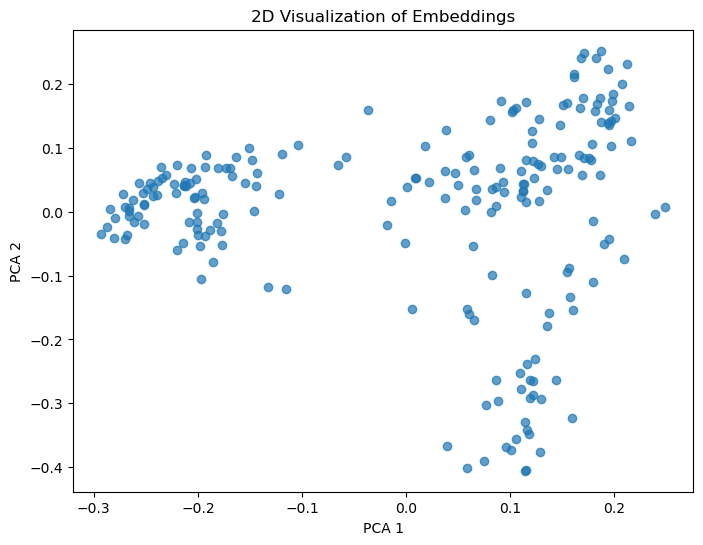

In [190]:
if embeddings_array.size > 0: 
    pca = PCA(n_components=2)
    embeddings_2d = pca.fit_transform(embeddings_array)

    # Plot embeddings
    plt.figure(figsize=(8, 6))
    plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], alpha=0.7)
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.title("2D Visualization of Embeddings")
    plt.show()
else:
    print("No embeddings available for PCA visualization.")


In [191]:
# df = pd.DataFrame(embeddings_2d, columns=['', ''])
# df.to_csv("embeddings.tsv", sep='\t', index=False)
